## **`📈 Stock Price Prediction using LSTM`**
* 🌐 Susanta Sekhar Palai
* 📧 susantasekhar1@gmail.com

>  ╰┈➤ 📊 Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Reliance.csv')  

In [3]:
stock = "Reliance" 

In [4]:
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2015-11-18  463.799988  465.649994  454.975006  456.000000  436.671021   
1  2015-11-19  459.450012  469.350006  458.625000  467.375000  447.563873   
2  2015-11-20  467.000000  476.399994  462.774994  473.424988  453.357422   
3  2015-11-23  475.000000  478.950012  473.100006  476.875000  456.661224   
4  2015-11-24  476.500000  485.799988  475.524994  483.850006  463.340515   

      Volume  
0  5142766.0  
1  5569752.0  
2  5167930.0  
3  4800026.0  
4  6768886.0  


In [5]:
print(df.tail())

            Date    Open         High          Low        Close    Adj Close  \
1228  2020-11-10  2077.0  2090.000000  2041.199951  2084.550049  2084.550049   
1229  2020-11-11  2089.0  2095.000000  1978.099976  1997.199951  1997.199951   
1230  2020-11-12  1981.0  2008.449951  1965.000000  1980.000000  1980.000000   
1231  2020-11-13  1982.0  2036.650024  1981.750000  1996.400024  1996.400024   
1232  2020-11-17  2085.0  2085.000000  1985.000000  1993.250000  1993.250000   

          Volume  
1228  17045147.0  
1229  26178477.0  
1230  18481466.0  
1231  20946864.0  
1232  21479385.0  


In [6]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03
mean,1036.035414,1048.479285,1023.015573,1035.164502,1024.471417,9.981743e+06
std,463.719976,469.906022,455.946191,462.301697,466.231636,7.603435e+06
min,459.000000,465.649994,444.049988,453.274994,434.061554,1.283997e+06
25%,551.925003,561.393768,546.000000,553.049988,540.720703,5.555522e+06
50%,959.099976,972.474976,946.675018,960.949982,946.843903,7.560520e+06
75%,1309.024963,1321.649963,1292.274963,1308.337494,1298.972321,1.140781e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.523004e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1232 non-null   float64
 2   High       1232 non-null   float64
 3   Low        1232 non-null   float64
 4   Close      1232 non-null   float64
 5   Adj Close  1232 non-null   float64
 6   Volume     1232 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'] , dayfirst=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9240\775853684.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'] , dayfirst=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.6 KB


In [11]:
df = df.sort_values('Date')
df = df.reset_index(drop=True)

In [12]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
968,2019-10-27,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.fillna(method='ffill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9240\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [14]:
df.fillna(method='bfill', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9240\3314729575.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [15]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(1233, 7)

In [18]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

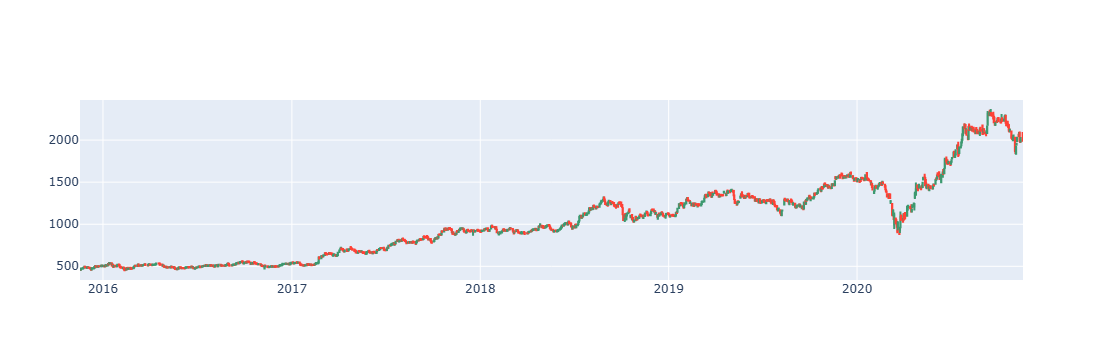

In [19]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'], low=df['Low'], close=df['Close'])
    ]
)
fig.update_layout(
    xaxis_rangeslider_visible=False
)
fig.show()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1233 non-null   float64       
 2   High       1233 non-null   float64       
 3   Low        1233 non-null   float64       
 4   Close      1233 non-null   float64       
 5   Adj Close  1233 non-null   float64       
 6   Volume     1233 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 67.6 KB


In [21]:
df = df.drop(['Date', 'Adj Close'], axis = 1)

In [22]:
print(df.head())

         Open        High         Low       Close     Volume
0  463.799988  465.649994  454.975006  456.000000  5142766.0
1  459.450012  469.350006  458.625000  467.375000  5569752.0
2  467.000000  476.399994  462.774994  473.424988  5167930.0
3  475.000000  478.950012  473.100006  476.875000  4800026.0
4  476.500000  485.799988  475.524994  483.850006  6768886.0


#### 📉 Closing Prices Over Time

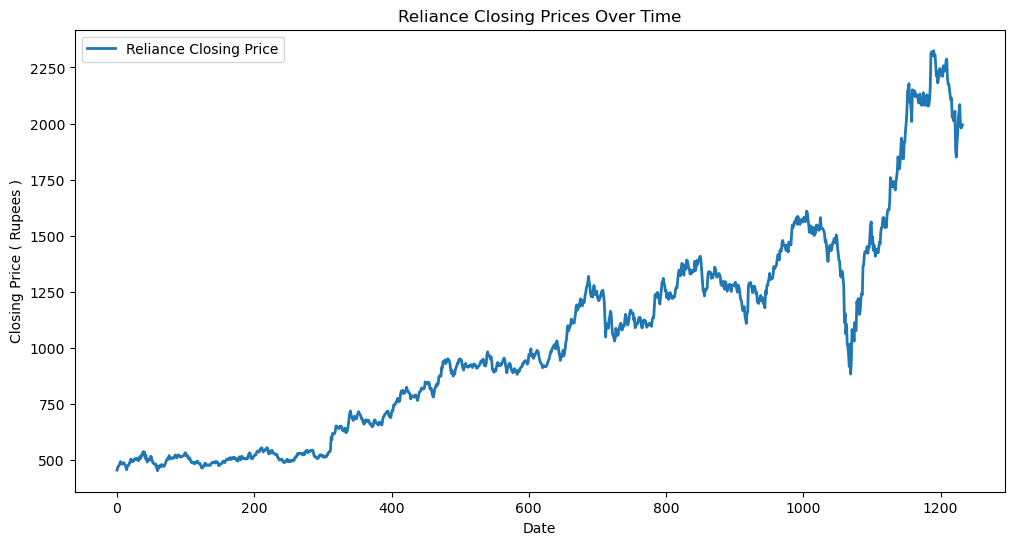

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 2)
plt.title(f'{stock} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ( Rupees )' )
plt.legend()
plt.show()

#### 📈 Opening Prices Over Time

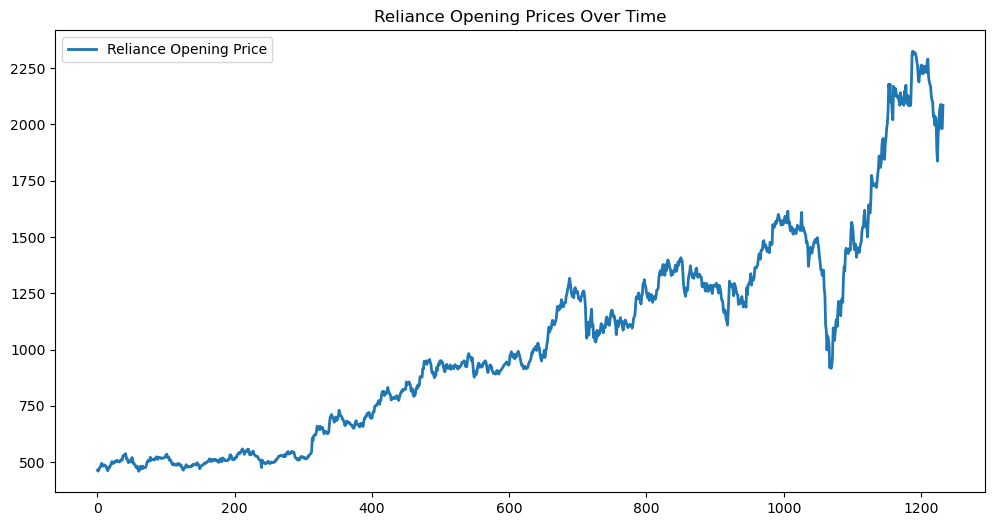

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 2)
plt.title(f'{stock} Opening Prices Over Time')
plt.legend()
plt.show()

#### 📈 High Prices Over Time

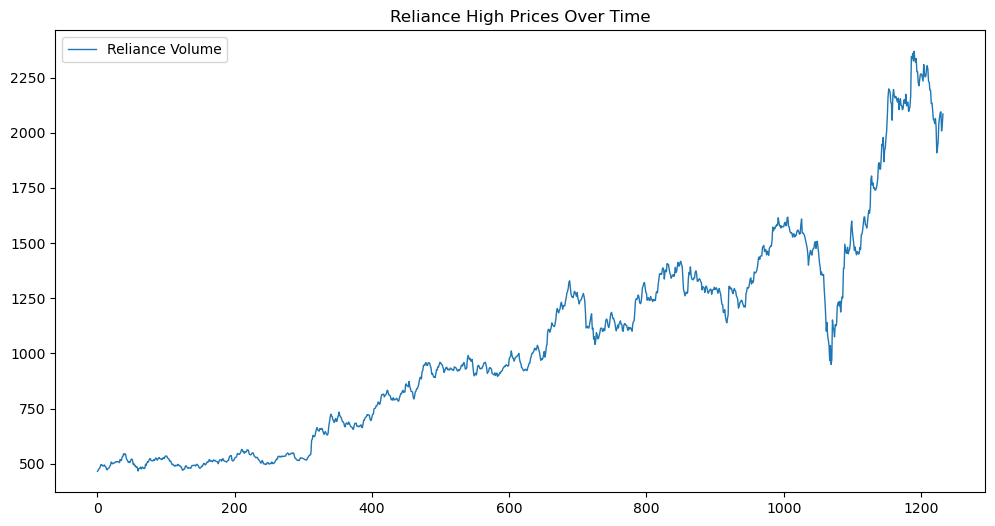

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} Volume', linewidth = 1)
plt.title(f'{stock} High Prices Over Time')
plt.legend()
plt.show()

#### 📈 Low Prices Over Time

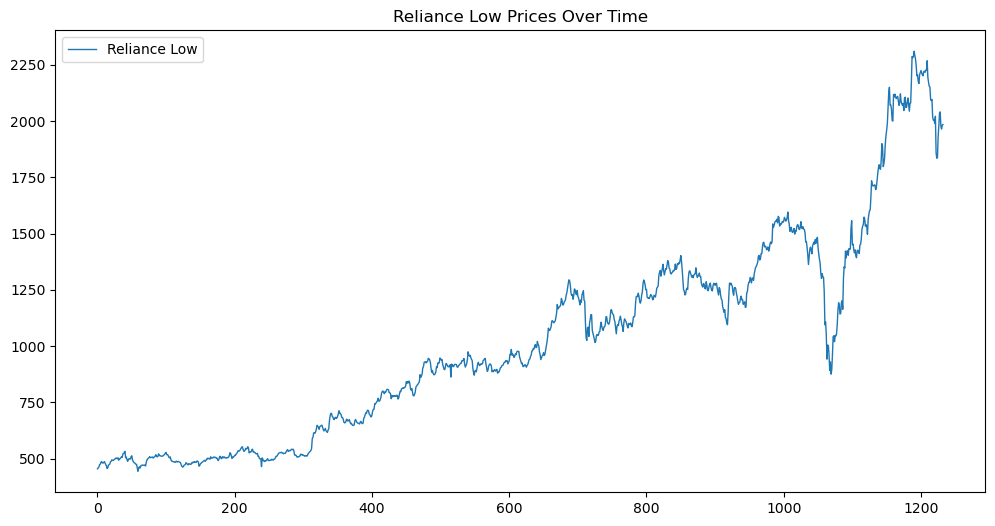

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Low'], label = f'{stock} Low', linewidth = 1)
plt.title(f'{stock} Low Prices Over Time')
plt.legend()
plt.show()

#### 💹 Checking Moving Average

In [27]:
df01 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 10, 130, 140, 150, 160, 170, 180, 190, 200]

print('Moving Average : ', sum(df01[0 : 5]) / 5)
print('Moving Average : ', sum(df01[1 : 6]) / 5)
print('Moving Average : ', sum(df01[2 : 7]) / 5)
print('Moving Average : ', sum(df01[3 : 9]) / 5)
print('Moving Average : ', sum(df01[4 : 10]) / 5)
print('Moving Average : ', sum(df01[5 : 11]) / 5)

Moving Average :  30.0
Moving Average :  40.0
Moving Average :  50.0
Moving Average :  78.0
Moving Average :  90.0
Moving Average :  102.0


In [28]:
df1 = pd.DataFrame(df01)

In [29]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


 #### 💹 100-day moving average (MA)

In [30]:
ma100 = df.Close.rolling(100).mean()

In [31]:
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1228    2071.561512
1229    2074.324512
1230    2076.846012
1231    2079.631012
1232    2082.147012
Name: Close, Length: 1233, dtype: float64

 #### 💹 200-day moving average (MA)

In [32]:
ma200 = df.Close.rolling(200).mean()

In [33]:
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
1228    1721.059958
1229    1723.411708
1230    1725.703957
1231    1728.153207
1232    1730.760707
Name: Close, Length: 1233, dtype: float64

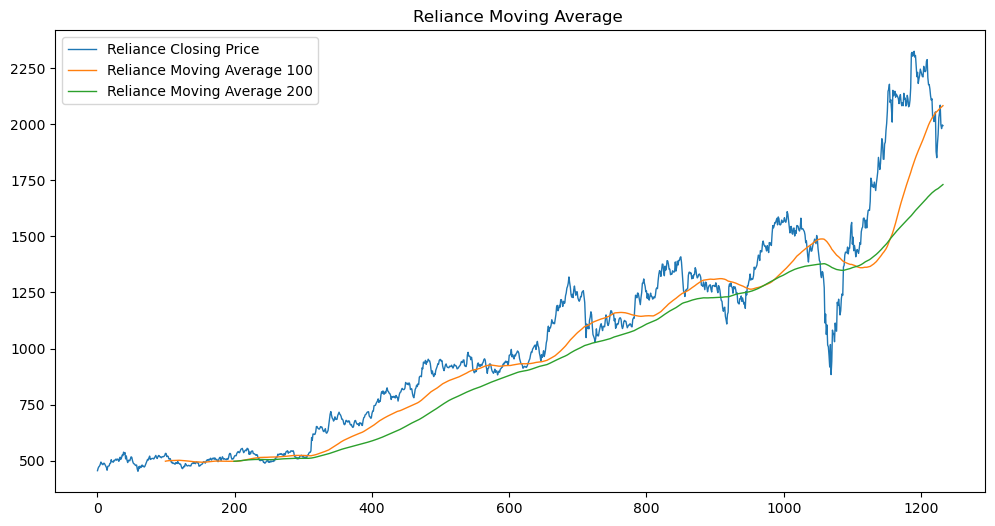

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Closing Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200', linewidth = 1)
plt.title(f'{stock} Moving Average ')
plt.legend()
plt.show()

#### 📊 100-period Exponential Moving Average

In [35]:
ema100 = df.Close.ewm(span=100, adjust=False).mean()

#### 📊 200-period Exponential Moving Average

In [36]:
ema200 = df['Close'].ewm(span=200, adjust=False).mean()

#### Percentage change Of Data ██████ 100%

In [37]:
df.pct_change()

,Open,High,Low,Close,Volume
0,NaN,NaN,NaN,NaN,NaN
1,-0.009379,0.007946,0.008022,0.024945,0.083027
2,0.016433,0.015021,0.009049,0.012945,-0.072144
3,0.017131,0.005353,0.022311,0.007287,-0.071190
4,0.003158,0.014302,0.005126,0.014626,0.410177
...,...,...,...,...,...
1228,0.007226,0.010150,0.002554,0.016507,0.030574
1229,0.005778,0.002392,-0.030913,-0.041904,0.535832
1230,-0.051699,-0.041313,-0.006623,-0.008612,-0.294021
1231,0.000505,0.014041,0.008524,0.008283,0.133398


#### ███░░ EMA 100 VS EMA 200

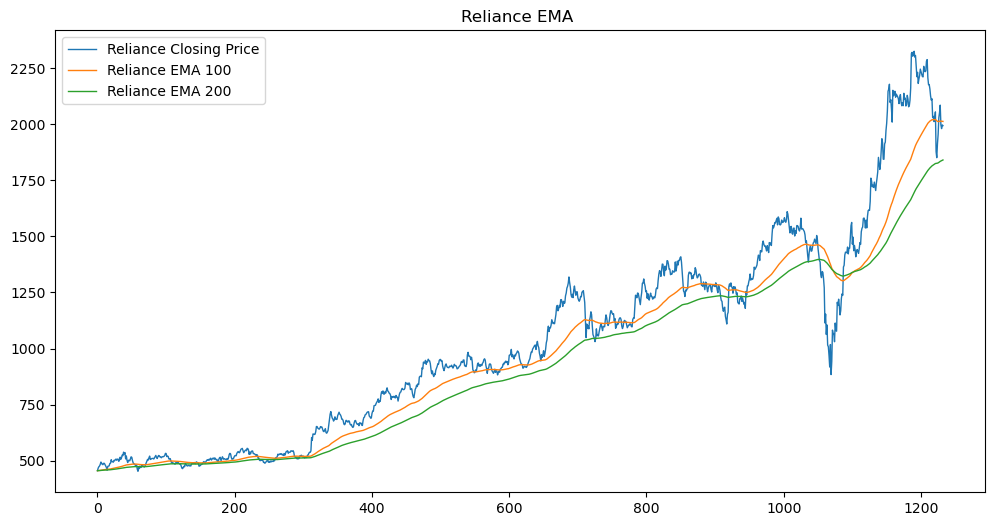

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Closing Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} EMA 100', linewidth = 1)
plt.plot(ema200, label = f'{stock} EMA 200', linewidth = 1)
plt.title(f'{stock} EMA ')
plt.legend()
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1233 non-null   float64
 1   High    1233 non-null   float64
 2   Low     1233 non-null   float64
 3   Close   1233 non-null   float64
 4   Volume  1233 non-null   float64
dtypes: float64(5)
memory usage: 48.3 KB


#### 🔎 Training & Testing

In [40]:
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70) :int(len(df))])

In [41]:
data_training.shape

(863, 1)

In [42]:
df.shape

(1233, 5)

In [43]:
data_testing.shape

(370, 1)

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_training_array = scaler.fit_transform(data_training)

In [45]:
data_training_array[0 : 5]

array([[0.00285169],
       [0.01475552],
       [0.02108677],
       [0.02469718],
       [0.03199646]])

In [46]:
data_training_array.shape[0]

863

In [47]:
data_training_array.shape

(863, 1)

In [48]:
import numpy as np

In [49]:
x_train = []
y_train = []

for i in range (100 , data_training_array.shape[0]) :
    x_train.append(data_training_array[i - 100 : i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train.shape

(763, 100, 1)

## `Model Building`

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

model = Sequential()

# 1st LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# 2nd LSTM layer
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# 3rd LSTM layer
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# 4th (LAST) LSTM layer
model.add(LSTM(units=100, activation='relu', return_sequences=False))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [52]:
print(x_train.shape)

(763, 100, 1)


In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          72,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,661 (604.14 KB)

 Trainable params: 154,661 (604.14 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 184ms/step - loss: 0.0965
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.0181
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0146
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0146
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0111
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0085
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0099
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - loss: 0.0099
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 0.0107
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 0.0108
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 0.0098
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - loss: 0.0096
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - loss: 0.0096
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.0118
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - l

In [55]:
past_100_days = data_training.tail(100)

In [56]:
past_100_days.columns

Index(['Close'], dtype='object')

In [57]:
past_100_days = data_training.tail(100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [58]:
final_df.head()

,Close
0,1128.449951
1,1100.199951
2,1089.150024
3,1098.349976
4,1120.199951


In [85]:
input_data = scaler.transform(final_df)

In [86]:
x_test = []
y_test = []

for i in range (100 , input_data.shape[0]) :
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [87]:
x_test.shape

(370, 100, 1)

In [88]:
y_predicted = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step


In [89]:
y_predicted.shape

(370, 1)

In [90]:
scaler.scale_

array([0.0006942])

In [91]:
scaler_factor = 1 / 1000
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

### 📊 Original Price vs Predicted Price

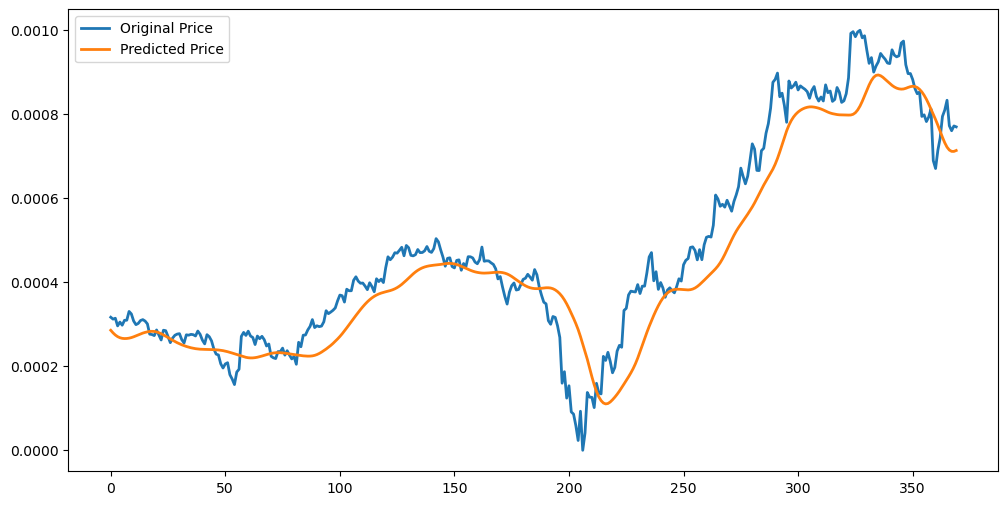

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 2)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 2)

plt.legend()
plt.show()

In [93]:
model.save('stock_dl_model.h5')